 # **<font color='blue'/>Importation des packages et chargement des données**

---



Importation des packages

In [1]:
import pandas as pd
import numpy as np

import zipfile as zf
import tarfile


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

from sklearn.linear_model import LinearRegression

import statsmodels

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelBinarizer

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer

from xgboost import XGBRegressor

from folium.plugins import HeatMap
from folium.plugins import MeasureControl

from IPython.core.display import display,HTML

import pickle

import warnings

chargement des données df_15_16 généré par "Pélec_01_notebook"

In [2]:
df_15_16 = pd.read_csv("df_15_16.csv")

Arrondir les valeurs à deux décimales

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# <font color='blue'/>**Préparation des données pour le pipeline**

---



In [4]:
col_df = ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
'PropertyName', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
'PropertyGFAParking', 'PropertyGFABuilding(s)',
'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
'DefaultData', 'ComplianceStatus', 'ZipCode', 'Latitude', 'Longitude',
'Address', 'City', 'State','Energy_use_feet', 'Source_proportion','energy_grad',
'HOTEL', 'POLICE STATION', 'OTHER', 'EDUCATION', 'HEALTH',
'OFFICE', 'COURTHOUSE', 'AUTOMOBILE DEALERSHIP', 'WAREHOUSE',
'STORE', 'RESIDENCE', 'MUSEUM', 'DISTRIBUTION CENTER', 'PARKING',
'RESTAURANT', 'DATA CENTER', 'CONVENTION CENTER', 'STRIP MALL',
'WHOLESALE CLUB/SUPERCENTER', 'MANUFACTURING/INDUSTRIAL PLANT',
'LIFESTYLE CENTER', 'FIRE STATION', 'PERFORMING ARTS',
'BANK BRANCH', 'MOVIE THEATER', 'PRISON/INCARCERATION']

df_15_16 = df_15_16[col_df]

Remplacer les valeurs manquantes des colonnes avec les informations de la superficie par 0

In [5]:
col_GFA = ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','HOTEL', 'POLICE STATION', 
           'OTHER', 'EDUCATION', 'HEALTH','OFFICE', 'COURTHOUSE', 'AUTOMOBILE DEALERSHIP', 'WAREHOUSE','STORE', 'RESIDENCE', 'MUSEUM', 
           'DISTRIBUTION CENTER', 'PARKING','RESTAURANT', 'DATA CENTER', 'CONVENTION CENTER', 'STRIP MALL','WHOLESALE CLUB/SUPERCENTER',
           'MANUFACTURING/INDUSTRIAL PLANT','LIFESTYLE CENTER', 'FIRE STATION', 'PERFORMING ARTS','BANK BRANCH', 'MOVIE THEATER', 'PRISON/INCARCERATION']
df_15_16[col_GFA] = df_15_16[col_GFA].fillna(0)

Effectuer le nettoyage de la colonne 'ListOfAllPropertyUseTypes'

In [6]:
pd.set_option("display.max_columns", 100)
df_15_16[['ListOfAllPropertyUseTypes']]

,ListOfAllPropertyUseTypes
0,HOTEL
1,HOTEL
2,"HOTEL, PARKING, RESTAURANT"
3,"HOTEL, PARKING, RESTAURANT"
4,"HOTEL, PARKING, SWIMMING POOL"
...,...
3221,OFFICE
3222,OTHER - RECREATION
3223,"FITNESS CENTER/HEALTH CLUB/GYM, OTHER - RECREA..."
3224,"FITNESS CENTER/HEALTH CLUB/GYM, FOOD SERVICE, ..."


Afficher les valeurs de la colonne 'PrimaryPropertyType' en majuscule

In [7]:
df_15_16['PrimaryPropertyType'] = df_15_16['PrimaryPropertyType'].str.upper()

Créer la dataframe df_pred

In [8]:
df_pred = df_15_16.copy()

Remplacement des caractères spéciaux ('-', (), espace) de la colonne 'ListOfAllPropertyUseTypes'

In [9]:
df_pred['ListOfAllPropertyUseTypes'] =  df_pred['ListOfAllPropertyUseTypes'].str.replace(' \(', '(')
df_pred['ListOfAllPropertyUseTypes'] =  df_pred['ListOfAllPropertyUseTypes'].str.replace(r'\((.*?)\)', '')
df_pred['ListOfAllPropertyUseTypes'] =  df_pred['ListOfAllPropertyUseTypes'].str.replace('OTHER - ', '')

df_pred['ListOfAllPropertyUseTypes'] =  df_pred['ListOfAllPropertyUseTypes'].str.replace(' ,', ',')
df_pred['ListOfAllPropertyUseTypes'] =  df_pred['ListOfAllPropertyUseTypes'].str.replace(', ', ',')

C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/3021313944.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pred['ListOfAllPropertyUseTypes'] =  df_pred['ListOfAllPropertyUseTypes'].str.replace(' \(', '(')
C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/3021313944.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pred['ListOfAllPropertyUseTypes'] =  df_pred['ListOfAllPropertyUseTypes'].str.replace(r'\((.*?)\)', '')


Compter le nombre des utilisations de la propriété dans  la colonne 'ListOfAllPropertyUseTypes'

In [10]:
df_pred['Count_List'] = df_pred['ListOfAllPropertyUseTypes'].str.count(',')+1
df_pred[['ListOfAllPropertyUseTypes','Count_List']].tail(5)

,ListOfAllPropertyUseTypes,Count_List
3221,OFFICE,1
3222,RECREATION,1
3223,"FITNESS CENTER/HEALTH CLUB/GYM,RECREATION,SWIM...",3
3224,"FITNESS CENTER/HEALTH CLUB/GYM,FOOD SERVICE,OF...",5
3225,"FITNESS CENTER/HEALTH CLUB/GYM,FOOD SERVICE,OF...",5


In [11]:
df_pred.shape

(3226, 72)

# **<font color='blue'/>Prédiction de la consommation annuelle d'énergie (SiteEnergyUse)**

---



## **Transformation et encodage des données avec le pipeline**

Créer dataframe df_pipeline_eu

In [12]:
df_pipeline_eu = df_pred.copy()

col=['PrimaryPropertyType','Neighborhood', 'Count_List',
     'LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',
    # 'LargestPropertyUseTypeGFA', 
    # 'SecondLargestPropertyUseTypeGFA', 
    # 'ThirdLargestPropertyUseTypeGFA',
      'HOTEL',
      'POLICE STATION',
      'OTHER',
      'EDUCATION',
      'HEALTH',
      'OFFICE',
      'COURTHOUSE',
      'AUTOMOBILE DEALERSHIP',
      'WAREHOUSE',
      'STORE',
      'RESIDENCE',
      'MUSEUM',
      'DISTRIBUTION CENTER',
      'PARKING',
      'RESTAURANT',
      'DATA CENTER',
      'CONVENTION CENTER',
      'STRIP MALL',
      'WHOLESALE CLUB/SUPERCENTER',
      'MANUFACTURING/INDUSTRIAL PLANT',
      'LIFESTYLE CENTER',
      'FIRE STATION',
      'PERFORMING ARTS',
      'BANK BRANCH',
      'MOVIE THEATER',
      'PRISON/INCARCERATION',
     'YearBuilt','NumberofBuildings','NumberofFloors',
     'PropertyGFAParking', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)']

df_pipeline_eu=df_pipeline_eu[col]

Convertir les colonnes catégorielles en (category)

In [13]:
col_astype = ['PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
df_pipeline_eu[col_astype]=df_pipeline_eu[col_astype].astype('category')

Séparer les colonnes numériques des colonnes catégorielles

In [14]:
num_features = make_column_selector(dtype_include=np.number)
cat_features = make_column_selector(dtype_exclude=np.number)

Définir les piplines numériques et catégorielles

In [15]:
num_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
# cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse=True))
cat_pipeline = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))
#cat_pipeline = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())

Processus de transformation des données en forme de pipeline

In [16]:
preprocessor = make_column_transformer((num_pipeline, num_features),
                                       (cat_pipeline, cat_features))

Fonction pour extraire les noms des colonnes du transformateur

In [17]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [f for f in column]

        return [f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

## **Régression linéaire**

---

Définir X et y pour notre modèle de régression

In [18]:
X = df_pipeline_eu.iloc[ :, :-1]
y =  df_pipeline_eu.iloc[ :, -1:]

Splitter les données en train et test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=77, shuffle=['LargestPropertyUseType'])

instancier le modèle

In [20]:
pipe = make_pipeline(preprocessor, LinearRegression())

Entraîner le modèle

In [21]:
model = pipe.fit(X_train, y_train)

les scores sur les données test et train

In [22]:
print('Score test  : ',model.score(X_test, y_test))
print('Score train : ',model.score(X_train, y_train))

Score test  :  0.8398989757503112
Score train :  0.7363586861225783


Définir les meilleurs hyperparamètres avec GridSearchCV

In [23]:
param_grid = {}

grid  = GridSearchCV(pipe, param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                         

Le modèle avec le meilleur score

In [24]:
grid.best_score_

0.6697727570309064

Enregistrer le meilleur modèle

In [25]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [26]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.8398989757503112
Score train (GridSearchCV) :  0.7363586861225783


In [27]:
y_pred = model_grid.predict(X_test)

Validation croisée RandomizedSearchCV

In [28]:
model_pipe_grid = RandomizedSearchCV(pipe, param_distributions={}, 
n_iter=1, #Nombre de réglages de paramètres échantillonnés
n_jobs=2,
scoring='r2',
cv=10)

Entrainer le modèle RandomizedSearchCV

In [29]:
model_pipe_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=

Meilleur score du RandomizedSearchCV

In [30]:
model_pipe_grid.best_score_

0.6697727570309064

Enregistrer le meilleur modèle

In [31]:
medel_best_rs = model_pipe_grid.best_estimator_

Prédiction sur l'échantillon test

In [32]:
y_pred = medel_best_rs.predict(X_test)

Calculons la RMSE Pipeline correspondante :

In [33]:
print("RMSE Pipeline : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE Pipeline : 4845157.58


Calculer MAPE :

In [34]:
print("MAPE : {:.2f}".format(mean_absolute_percentage_error(y_test , y_pred)))

MAPE : 87268662124250152960.00


Tester le modèle RandomizedSearchCV sur les données test et train

In [35]:
print('Score test (RandomizedSearchCV)  : ', medel_best_rs.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_best_rs.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.8398989757503112
Score train (RandomizedSearchCV) :  0.7363586861225783


## **Modèle de régression Ridge**

---

Définir X et y pour notre modèle de régression

In [36]:
X = df_pipeline_eu.iloc[ :, :-1]
y =  df_pipeline_eu.iloc[ :, -1:]

Splitter les données en train et test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=77)

Instancier le modèle

In [38]:
# lmr = make_pipeline(preprocessor, linear_model.Ridge())
lmr = Pipeline([( "transform" , preprocessor),
                 ("lmr",linear_model.Ridge())])

Entrainer Ridge modèle

In [39]:
lmr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_

les scores sur les données test et train

In [40]:
print('Score test  : ',lmr.score(X_test, y_test))
print('Score train : ',lmr.score(X_train, y_train))

Score test  :  0.8412835506011728
Score train :  0.7362572444465293


Validation croisée GridSearchCV

In [41]:
param_grid = {'lmr__alpha': np.arange(0.,1),
              'lmr__tol':np.arange(0.001,1)
              }

grid  = GridSearchCV(lmr, param_grid, cv=10)

In [42]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                 

Le modèle avec le meilleur score

In [43]:
grid.best_score_

-6.228455918384359e+35

Les meilleurs hyper paramètres utilisés

In [44]:
grid.best_params_

{'lmr__alpha': 0.0, 'lmr__tol': 0.001}

Enregistrer le meilleur modèle

In [45]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [46]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.832159576651301
Score train (GridSearchCV) :  0.729518314121699


Validation croisée RandomizedSearchCV

In [47]:
param_distributions= {
                       'lmr__alpha': [0.,1],
                       'lmr__fit_intercept': [True, False],
                      }

lmr_grid = RandomizedSearchCV(lmr, param_distributions=param_distributions, cv=10)

Entrainer le modèle RandomizedSearchCV

In [48]:
model_lmr_grid = lmr_grid.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleur score du RandomizedSearchCV

In [49]:
model_lmr_grid.best_score_

0.6769318118740818

Les meilleurs paramètres

In [50]:
model_lmr_grid.best_params_

{'lmr__fit_intercept': True, 'lmr__alpha': 1}

Le meilleur score

In [51]:
model_lmr_grid.best_score_

0.6769318118740818

Enregistrer le meilleur modèle

In [52]:
medel_lmr_best = model_lmr_grid.best_estimator_

Prédiction sur l'échantillon test

In [53]:
y_pred = medel_lmr_best.predict(X_test)

Calculons la RMSE du Ridge modèle correspondante :

In [54]:
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE : 4824161.30


Calculer MAPE :

In [55]:
print("MAPE : {:.2f}".format(mean_absolute_percentage_error(y_test , y_pred)))

MAPE : 87814268018847563776.00


Tester le modèle RandomizedSearchCV sur les données test et train

In [56]:
print('Score test (RandomizedSearchCV)  : ', medel_lmr_best.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_lmr_best.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.8412835506011728
Score train (RandomizedSearchCV) :  0.7362572444465293


Graphique des vraies valeurs avec les valeurs prédites

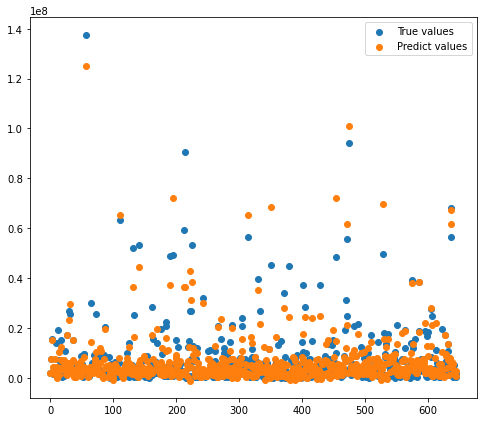

In [57]:
fig = plt.subplots(figsize=(8,7))

x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

## **Modèle de régression Lasso**

---

Définir X et y pour notre modèle de régression

In [58]:
X = df_pipeline_eu.iloc[ :, :-1]
y =  df_pipeline_eu.iloc[ :, -1:]

Splitter les données en train et test

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=77)

Intancier le modèle

In [60]:
lml = Pipeline([( "transform" , preprocessor),
                 ("lml",linear_model.Lasso())])

Entraîner le modèle

In [61]:
lml.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.655e+16, tolerance: 2.809e+13
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_

les scores sur les données test et train

In [62]:
print('Score test  : ',lml.score(X_test, y_test))
print('Score train : ',lml.score(X_train, y_train))

Score test  :  0.8400829444988855
Score train :  0.7365011146541594


Validation croisée GridSearchCV

In [63]:
param_grid = {
              'lml__alpha': [0],
              'lml__fit_intercept': [False],
              'lml__tol':[0.01],
              'lml__selection':['random'],
              }

grid  = GridSearchCV(lml, param_grid, cv=10)

In [64]:
grid.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+16, tolerance: 3.398e+15 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                 

Le modèle avec le meilleur score

In [65]:
grid.best_score_

0.6701626433536282

Les meilleurs hyper paramètres utilisés

In [66]:
grid.best_params_

{'lml__alpha': 0,
 'lml__fit_intercept': False,
 'lml__selection': 'random',
 'lml__tol': 0.01}

Enregistrer le meilleur modèle

In [67]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [68]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.8398204872751519
Score train (GridSearchCV) :  0.7364983058296696


Validation croisée RandomizedSearchCV

In [69]:
param_distributions= {
                      'lml__alpha': [0],
                      'lml__fit_intercept': [False],
                      'lml__tol':[0.001],
                      'lml__selection':['random'],
                      }

lml_grid_rd = RandomizedSearchCV(lml, param_distributions=param_distributions, cv=10)
lml_grid_rd.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpl

Entrainer le modèle RandomizedSearchCV

In [70]:
model_lml_grid = lml_grid_rd.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Meilleur score du RandomizedSearchCV

In [71]:
lml_grid_rd.best_score_

0.6704209938452823

Les meilleurs paramètres

In [72]:
lml_grid_rd.best_params_

{'lml__tol': 0.001,
 'lml__selection': 'random',
 'lml__fit_intercept': False,
 'lml__alpha': 0}

Le meilleur score

In [73]:
lml_grid_rd.best_score_

0.6704209938452823

Enregistrer le meilleur modèle

In [74]:
medel_lml_best = lml_grid_rd.best_estimator_

Prédiction sur l'échantillon test

In [75]:
y_pred = medel_lml_best.predict(X_test)

Calculons la RMSE du Lasso modèle correspondante :

In [76]:
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE : 4843610.75


Calculer MAPE :

In [77]:
print("MAPE : {:.2f}".format(mean_absolute_percentage_error(y_test , y_pred)))

MAPE : 87625517549637255168.00


Tester le modèle RandomizedSearchCV sur les données test et train

In [78]:
print('Score test (RandomizedSearchCV)  : ', medel_lml_best.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_lml_best.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.8400011844761313
Score train (RandomizedSearchCV) :  0.736499574519076


Graphique des vraies valeurs avec les valeurs prédites

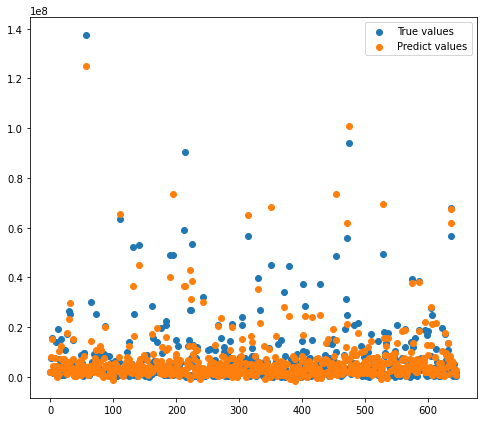

In [79]:
fig = plt.subplots(figsize=(8,7))

x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

Score data test

## **Modèle de régression Random Forest**
---





Définir X et y

In [80]:
X = df_pipeline_eu.iloc[ :, :-1]
y =  np.ravel(df_pipeline_eu.iloc[ :, -1:])

Splitter les données en train et test

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30, shuffle=['LargestPropertyUseType'])

Créer l'objet RandomForestRegressor 

In [82]:
rfr = Pipeline([( "transform" , preprocessor),
                 ("rfr",RandomForestRegressor())])

Entraîner le modèle RandomForest

In [83]:
model = rfr.fit(X_train,y_train)

Les nom des colonnes après encodage aved 'onehotencoder'

In [84]:
rfr['transform'].transformers_[1][1]['onehotencoder'].get_feature_names()

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_EDUCATION', 'x0_HEALTH', 'x0_HOTEL', 'x0_OFFICE', 'x0_OTHER',
       'x0_RESIDENCE', 'x0_RESTAURANT', 'x0_STORE', 'x0_WAREHOUSE',
       'x1_BALLARD', 'x1_CENTRAL', 'x1_DELRIDGE', 'x1_DOWNTOWN',
       'x1_EAST', 'x1_GREATER DUWAMISH', 'x1_LAKE UNION',
       'x1_MAGNOLIA / QUEEN ANNE', 'x1_NORTH', 'x1_NORTHEAST',
       'x1_NORTHWEST', 'x1_SOUTHEAST', 'x1_SOUTHWEST',
       'x2_AUTOMOBILE DEALERSHIP', 'x2_BANK BRANCH',
       'x2_CONVENTION CENTER', 'x2_COURTHOUSE', 'x2_DATA CENTER',
       'x2_DISTRIBUTION CENTER', 'x2_EDUCATION', 'x2_FIRE STATION',
       'x2_HEALTH', 'x2_HOTEL', 'x2_LIFESTYLE CENTER',
       'x2_MANUFACTURING/INDUSTRIAL PLANT', 'x2_MOVIE THEATER',
       'x2_MUSEUM', 'x2_OFFICE', 'x2_OTHER', 'x2_PARKING',
       'x2_PERFORMING ARTS', 'x2_POLICE STATION',
       'x2_PRISON/INCARCERATION', 'x2_RESIDENCE', 'x2_RESTAURANT',
       'x2_STORE', 'x2_STRIP MALL', 'x2_WAREHOUSE',
       'x2_WHOLESALE CLUB/SUPERCENTER', 'x2_missing_value',
       'x3_AUTOMOBILE DE

Afficher les caractéristiques les plus importantes :

C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer simpleimputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer standardscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


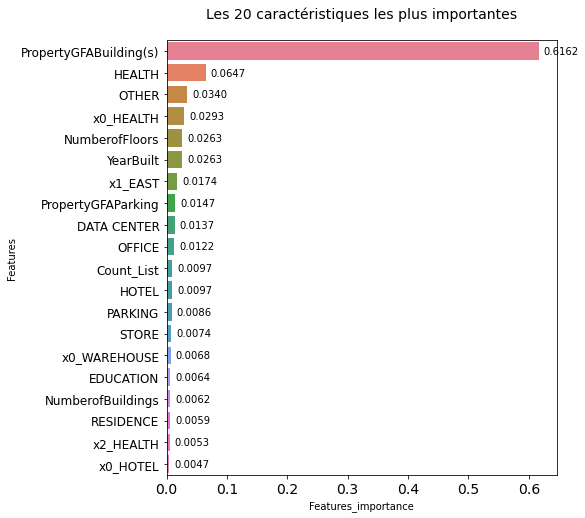

In [85]:
  # Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': get_feature_names(preprocessor),
              'Features_importance':rfr['rfr'].feature_importances_
              })
df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20,palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Evaluer le modèle RandomForest

In [86]:
r_square = metrics.r2_score(y_test, y_pred)
print('R square error RandomForest: ', r_square)

R square error RandomForest:  -1.2542443170362962


Score data test et data train

In [87]:
print('Score test  : ',model.score(X_test,y_test))
print('Score train : ',model.score(X_train,y_train))

Score test  :  0.9278446166910761
Score train :  0.9729066750054202


Validatinon croisée GridSearchCV pour Définir les meilleurs hyperparamètres

In [88]:
param_grid = {
              'rfr__n_estimators': [200],
              # 'rfr__verbose':np.arange(0,4),
              'rfr__max_depth': [20],
              'rfr__max_features':['auto'],
              'rfr__min_samples_leaf':[1],
              # 'bootstrap':['True', 'False'],
              }

grid  = GridSearchCV(rfr, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                  

Le modèle avec le meilleur score

In [89]:
grid.best_score_

0.8109531701805907

Les meilleurs hyperparamètres utilisés

In [90]:
grid.best_params_

{'rfr__max_depth': 20,
 'rfr__max_features': 'auto',
 'rfr__min_samples_leaf': 1,
 'rfr__n_estimators': 200}

Enregistrer le meilleur modèle

In [91]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [92]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.9232437960297031
Score train (GridSearchCV) :  0.9712656548659608


Recherche à validation croisée randomisée RandomizedSearchCV

In [93]:
param_distributions = {
                        'rfr__n_estimators': [200], #Le nombre d'arbres dans la forêt
                        # 'rfr__criterion':['squared_error', 'absolute_error', 'poisson'], #The function to measure the quality of a split
                        'rfr__max_depth': [20], #la profondeur de l'arbre
                        'rfr__min_samples_leaf':[1], #Le minimum d'échantillons par feuille
                        # 'rfr__min_samples_split':[2], #Le nombre minimum d'échantillons requis pour diviser un nœud interne
                        'rfr__max_features':['auto'], #The number of features to consider when looking for the best split
                       }
rscv = RandomizedSearchCV(rfr, param_distributions=param_distributions, cv=5)
model_rscv = rscv.fit(X_train,y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Validation curve

In [94]:
# n = np.logspace(-7, 3, 9)
# n = np.arange(1,10)
n=[60,80,200]

train_score, val_score = validation_curve(model_grid, X_train, y_train, param_name="rfr__n_estimators", param_range=n, scoring='r2', cv=5)

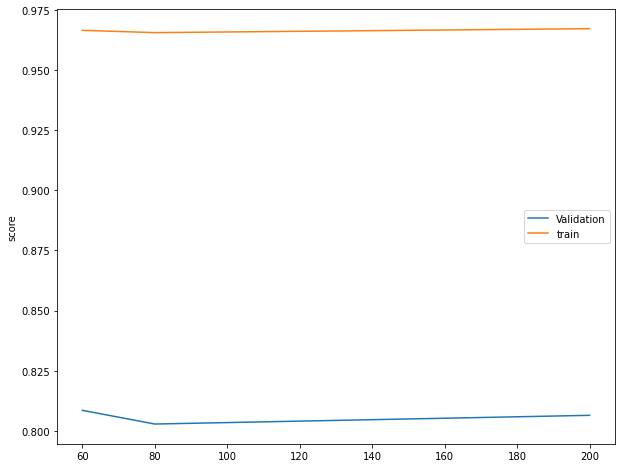

In [95]:
ax = plt.subplots(figsize=(10,8))

plt.plot(n, val_score.mean(axis=1), label='Validation')
plt.plot(n, train_score.mean(axis=1), label='train')

plt.xlabel('')
plt.ylabel('score')
plt.legend()
plt.show()

Le meilleur score

In [96]:
model_rscv.best_score_

0.8085886953370147

Les meilleurs paramètres

In [97]:
model_rscv.best_params_

{'rfr__n_estimators': 200,
 'rfr__min_samples_leaf': 1,
 'rfr__max_features': 'auto',
 'rfr__max_depth': 20}

Enregistrer le meilleur modèle

In [98]:
medel_best_rscv = model_rscv.best_estimator_

Prédiction sur l'échantillon test

In [99]:
y_pred = medel_best_rscv.predict(X_test)

L'erreur quadratique moyenne

In [100]:
np.sqrt(mean_squared_error(y_test,y_pred))

2887410.5282750484

Calculons la RMSE correspondante :

In [101]:
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE : 2887410.53


Calculer MAPE :

In [102]:
print("MAPE : {:.2f}".format(mean_absolute_percentage_error(y_test , y_pred)))

MAPE : 36795355024343121920.00


Tester le modèle RandomizedSearchCV sur les données test et train

In [103]:
print('Score test (RandomizedSearchCV)  : ', medel_best_rscv.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_best_rscv.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.9223900093808917
Score train (RandomizedSearchCV) :  0.9727939414225786


Ci-dessous le graphique de valeurs test et les valeurs prédites :

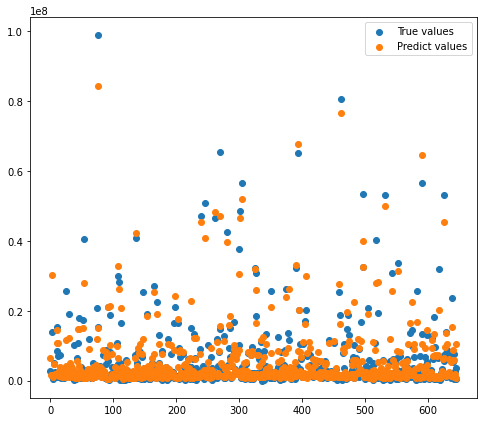

In [104]:
fig = plt.subplots(figsize=(8,7))

y_pred = medel_best_rscv.predict(X_test)

x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

## **Modèle de régression xgboost**

---



Définir X et y

In [105]:
X = df_pipeline_eu.iloc[ :, :-1]
y =  df_pipeline_eu.iloc[ :, -1:]

Splitter les données en train et test

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30, shuffle=['LargestPropertyUseType'])

Créer l'objet RandomForestRegressor 

In [107]:
xgbr = Pipeline([
                 ("transform" , preprocessor),
                 ("xgbr",XGBRegressor())
                 ])

Entraîner le modèle

In [108]:
xgbr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   O...
                

Tester le modèle sur les données test et train

In [109]:
print('Score test    : ', xgbr.score(X_test, y_test))
print('Score train   : ', xgbr.score(X_train, y_train))

Score test    :  0.9194903022903842
Score train   :  0.9879717341604614


Afficher les caractéristiques les plus importantes :

C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer simpleimputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer standardscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


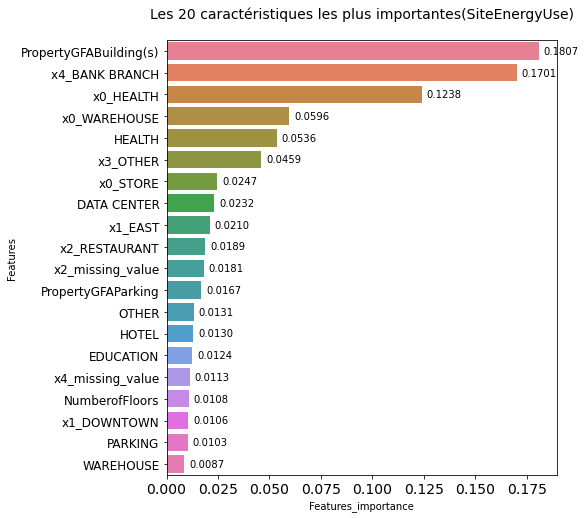

In [110]:
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': get_feature_names(preprocessor),
              'Features_importance':xgbr['xgbr'].feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes(SiteEnergyUse)\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Définir les meilleurs hyperparamètres avec GridSearchCV

In [111]:
param_grid = {
                'xgbr__n_estimators': [400],
                'xgbr__alpha':[0],
                'xgbr__max_features': ['auto'],
                'xgbr__max_depth': [5],
                'xgbr__subsample': [1],
                # 'xgbr__min_samples_split': [1],
                # 'xgbr__min_samples_leaf': [1],
                # 'xgbr__bootstrap': [True],
                'xgbr__validate_parameters':[False],
                'xgbr__learning_rate':[0.29],
                'xgbr__colsample_bytree': [0.22],
                # 'xgbr__tree_method': ['auto'],
                # 'xgbr__min_child_weight':[1],
              }

grid  = GridSearchCV(xgbr, param_grid, cv=5)
grid.fit(X_train, y_train)

[09:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:23:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:23:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  Thi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                  

GridSearchCV : Le modèle avec le meilleur score

In [112]:
grid.best_score_

0.7822542613360226

GridSearchCV : Les meilleurs hyperparamètres utilisés

In [113]:
grid.best_params_

{'xgbr__alpha': 0,
 'xgbr__colsample_bytree': 0.22,
 'xgbr__learning_rate': 0.29,
 'xgbr__max_depth': 5,
 'xgbr__max_features': 'auto',
 'xgbr__n_estimators': 400,
 'xgbr__subsample': 1,
 'xgbr__validate_parameters': False}

GridSearchCV : Enregistrerle meilleur modèle

In [114]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [115]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.9311884170368997
Score train (GridSearchCV) :  0.9941201539521065


Prédiction sur l'échantillon test

In [116]:
y_pred = model_grid.predict(X_test)

Recherche à validation croisée randomisée RandomizedSearchCV

In [117]:
param_distributions = { 
                'xgbr__n_estimators': [400],
                'xgbr__alpha':[0],
                'xgbr__max_features': ['auto'],
                'xgbr__max_depth': [5],
                'xgbr__subsample': [1],
                # 'xgbr__min_samples_split': [1],
                # 'xgbr__min_samples_leaf': [1],
                # 'xgbr__bootstrap': [True],
                'xgbr__validate_parameters':[False],
                'xgbr__learning_rate':[0.29],
                'xgbr__colsample_bytree': [0.22],
                # 'xgbr__tree_method': ['auto'],
                # 'xgbr__min_child_weight':[1],
                }

rscv = RandomizedSearchCV(xgbr, param_distributions=param_distributions, n_iter=10, cv=5)
rscv.fit(X_train,y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[09:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:24:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  Thi

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simple

RandomizedSearchCV : Le meilleur score

In [118]:
rscv.best_score_

0.7822542613360226

RandomizedSearchCV : Les meilleurs paramètres

In [119]:
rscv.best_params_

{'xgbr__validate_parameters': False,
 'xgbr__subsample': 1,
 'xgbr__n_estimators': 400,
 'xgbr__max_features': 'auto',
 'xgbr__max_depth': 5,
 'xgbr__learning_rate': 0.29,
 'xgbr__colsample_bytree': 0.22,
 'xgbr__alpha': 0}

RandomizedSearchCV : Enregistrer le meilleur modèle

In [120]:
medel_best_rscv = rscv.best_estimator_

Prédiction sur l'échantillon test

In [121]:
y_pred = medel_best_rscv.predict(X_test)

Calculons la RMSE du xgboost modèle correspondante :

In [122]:
print("RMSE xgboost : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE xgboost : 2718820.24


Calculer MAPE :

In [123]:
print("MAPE : {:.2f}".format(mean_absolute_percentage_error(y_test , y_pred)))

MAPE : 32285430803304480768.00


Tester le modèle RandomizedSearchCV sur les données test et train

In [124]:
print('Score test (RandomizedSearchCV)  : ', medel_best_rscv.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_best_rscv.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.9311884170368997
Score train (RandomizedSearchCV) :  0.9941201539521065


Ci-dessous le graphique des valeurs test et les valeurs prédites :

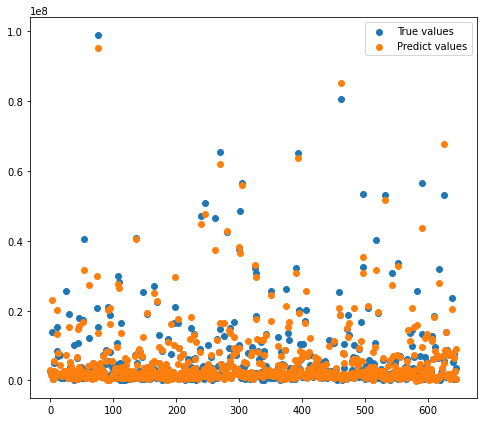

In [125]:
fig = plt.subplots(figsize=(8,7))

y_pred = medel_best_rscv.predict(X_test)

x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

## **Modèle xgboost avec ENERGY Star**

---



Créer dataframe avec la variable "ENERGYSTARScore"

In [126]:
df_pipe_score = df_pred.copy()
col_score = ['PrimaryPropertyType','Neighborhood', 'Count_List',
             'LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',
            # 'LargestPropertyUseTypeGFA', 
            # 'SecondLargestPropertyUseTypeGFA', 
            # 'ThirdLargestPropertyUseTypeGFA',
              'HOTEL',
              'POLICE STATION',
              'OTHER',
              'EDUCATION',
              'HEALTH',
              'OFFICE',
              'COURTHOUSE',
              'AUTOMOBILE DEALERSHIP',
              'WAREHOUSE',
              'STORE',
              'RESIDENCE',
              'MUSEUM',
              'DISTRIBUTION CENTER',
              'PARKING',
              'RESTAURANT',
              'DATA CENTER',
              'CONVENTION CENTER',
              'STRIP MALL',
              'WHOLESALE CLUB/SUPERCENTER',
              'MANUFACTURING/INDUSTRIAL PLANT',
              'LIFESTYLE CENTER',
              'FIRE STATION',
              'PERFORMING ARTS',
              'BANK BRANCH',
              'MOVIE THEATER',
              'PRISON/INCARCERATION',
              'YearBuilt','NumberofBuildings','NumberofFloors',
              'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore' ,'SiteEnergyUse(kBtu)']

df_pipe_score=df_pipe_score[col_score]

Définir X et y :

In [127]:
X = df_pipe_score.iloc[ :, :-1]
y = df_pipe_score.iloc[ :, -1:]

Splitter les données en train et test

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30, shuffle=['LargestPropertyUseType'])

Créer l'objet RandomForestRegressor 

In [129]:
xgbr = Pipeline([
                 ("transform" , preprocessor),
                 ("xgbr",XGBRegressor())
                 ])

Entraîner le modèle

In [130]:
xgbr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   O...
                

Tester le modèle sur les données test et train

In [131]:
print('Score test   : ', xgbr.score(X_test, y_test))
print('Score train  : ', xgbr.score(X_train, y_train))

Score test   :  0.92985400168645
Score train  :  0.9938167853495067


Afficher les caractéristiques les plus importantes :

C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer simpleimputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer standardscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


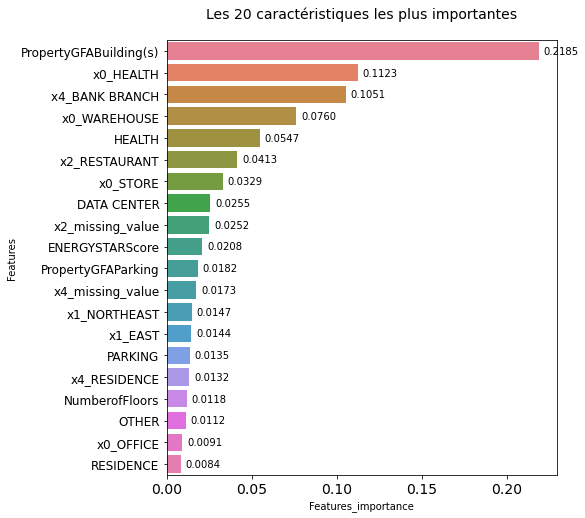

In [132]:
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': get_feature_names(preprocessor),
              'Features_importance':xgbr['xgbr'].feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Définir les meilleurs hyperparamètres avec GridSearchCV

In [133]:
param_grid = {
                'xgbr__n_estimators': [400],
                'xgbr__alpha':[0],
                'xgbr__max_features': ['auto'],
                'xgbr__max_depth': [5],
                'xgbr__subsample': [1],
                # 'xgbr__min_samples_split': [1],
                # 'xgbr__min_samples_leaf': [1],
                # 'xgbr__bootstrap': [True],
                'xgbr__validate_parameters':[False],
                'xgbr__learning_rate':[0.29],
                'xgbr__colsample_bytree': [0.22],
                # 'xgbr__tree_method': ['auto'],
                # 'xgbr__min_child_weight':[1],
              }

grid  = GridSearchCV(xgbr, param_grid, cv=5)
grid.fit(X_train, y_train)

[09:24:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:24:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  Thi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                  

GridSearchCV : Le modèle avec le meilleur score

In [134]:
grid.best_score_

0.790152756869586

GridSearchCV : Les meilleurs hyperparamètres utilisés

In [135]:
grid.best_params_

{'xgbr__alpha': 0,
 'xgbr__colsample_bytree': 0.22,
 'xgbr__learning_rate': 0.29,
 'xgbr__max_depth': 5,
 'xgbr__max_features': 'auto',
 'xgbr__n_estimators': 400,
 'xgbr__subsample': 1,
 'xgbr__validate_parameters': False}

GridSearchCV : Enregistrerle meilleur modèle

In [136]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [137]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.9416031986708912
Score train (GridSearchCV) :  0.9980586239237238


Prédiction sur l'échantillon test

In [138]:
y_pred = model_grid.predict(X_test)

Validation croisée randomisée RandomizedSearchCV

In [139]:
param_distributions = { 
                'xgbr__n_estimators': [400],
                'xgbr__alpha':[0],
                'xgbr__max_features': ['auto'],
                'xgbr__max_depth': [5],
                'xgbr__subsample': [1],
                # 'xgbr__min_samples_split': [1],
                # 'xgbr__min_samples_leaf': [1],
                # 'xgbr__bootstrap': [True],
                'xgbr__validate_parameters':[False],
                'xgbr__learning_rate':[0.29],
                'xgbr__colsample_bytree': [0.22],
                # 'xgbr__tree_method': ['auto'],
                # 'xgbr__min_child_weight':[1],
                }

rscv = RandomizedSearchCV(xgbr, param_distributions=param_distributions, n_iter=10, cv=5)
rscv.fit(X_train,y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[09:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:24:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  Thi

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000025872F3BB20>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simple

RandomizedSearchCV : Le meilleur score

In [140]:
rscv.best_score_

0.790152756869586

RandomizedSearchCV : Les meilleurs paramètres

In [141]:
rscv.best_params_

{'xgbr__validate_parameters': False,
 'xgbr__subsample': 1,
 'xgbr__n_estimators': 400,
 'xgbr__max_features': 'auto',
 'xgbr__max_depth': 5,
 'xgbr__learning_rate': 0.29,
 'xgbr__colsample_bytree': 0.22,
 'xgbr__alpha': 0}

RandomizedSearchCV : Enregistrer le meilleur modèle

In [142]:
medel_best_rscv = rscv.best_estimator_

Prédiction sur l'échantillon test

In [143]:
y_pred = medel_best_rscv.predict(X_test)

Calculons la RMSE du xgboost modèle correspondante :

In [144]:
print("RMSE xgboost : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE xgboost : 2504633.87


Calculer MAPE :

In [145]:
print("MAPE : {:.2f}".format(mean_absolute_percentage_error(y_test , y_pred)))

MAPE : 27393348650337234944.00


Tester le modèle RandomizedSearchCV sur les données test et train

In [146]:
print('Score test (RandomizedSearchCV)  : ', medel_best_rscv.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_best_rscv.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.9416031986708912
Score train (RandomizedSearchCV) :  0.9980586239237238


Ci-dessous le graphique des valeurs tests et les valeurs prédites :

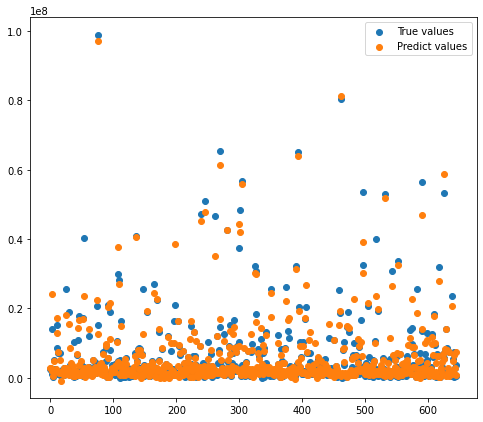

In [147]:
fig = plt.subplots(figsize=(8,7))

y_pred = medel_best_rscv.predict(X_test)

x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

**Remarque**

La variable "ENERGYSTARScore" n'a pas un impact important sur la prédiction de La quantité annuelle d'énergie consommée «SiteEnergyUse».

## **Conclusions**

---


Tableau de performance des modèles

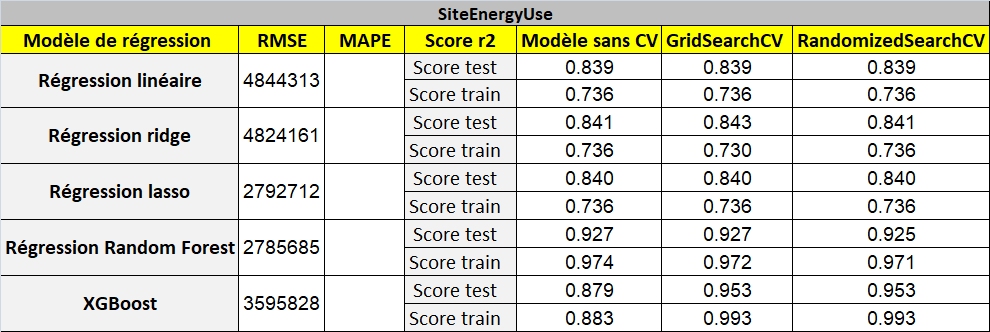

Graphique des conclusions des scores

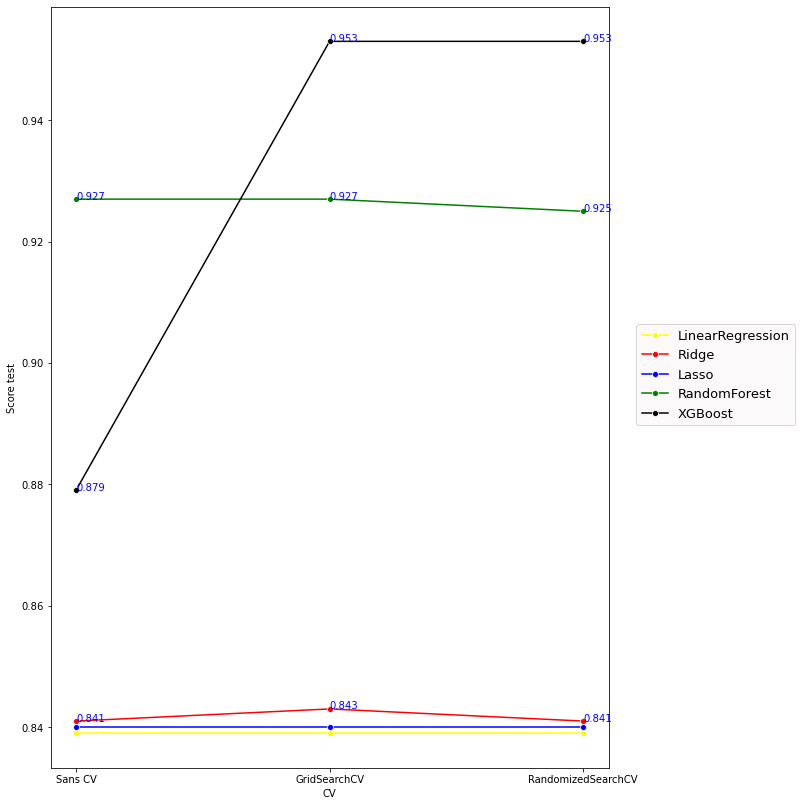

In [148]:
conclusion_score = pd.DataFrame({'CV': ['Sans CV','GridSearchCV', 'RandomizedSearchCV'],
                                 'LinearRegression': [0.839,0.839,0.839], 
                                 'Ridge': [0.841,0.843,0.841], 
                                 'Lasso': [0.840,0.840,0.840], 
                                 'RandomForest': [0.927,0.927,0.925], 
                                 'XGBoost': [0.879,0.953,0.953]},
                      index = np.arange(0,3)
                      )
# Graphique des scores
fig, ax = plt.subplots(figsize=(10,14))

ax = sns.lineplot(x='CV', y="LinearRegression", data=conclusion_score, palette="husl",marker='o', label='LinearRegression', color= 'yellow')
ax = sns.lineplot(x='CV', y="Ridge", data=conclusion_score, palette="husl",marker='o', label='Ridge', color= 'r')
ax = sns.lineplot(x='CV', y="Lasso", data=conclusion_score, palette="husl",marker='o', label='Lasso', color= 'blue')
ax = sns.lineplot(x='CV', y="RandomForest", data=conclusion_score, palette="husl",marker='o', label='RandomForest', color= 'g')
ax = sns.lineplot(x='CV', y="XGBoost", data=conclusion_score, palette="husl",marker='o', label='XGBoost', color= 'black')

tab = ["LinearRegression", 'Ridge', 'Lasso','RandomForest', 'XGBoost']

for i in range(len(tab)):
  for item, color in zip(conclusion_score.groupby('CV'),['b','b','b','b','b']):
      #item[1] is a grouped data frame
      for x,y in item[1][['CV',tab[i]]].values:
        if(y>0.84):
          ax.text(x,y,f'{y:.3f}',color=color)

ax.set_ylabel("Score test", fontsize=10)
plt.legend(loc=[1.05,0.45],fontsize=13,facecolor='#fbf8f8')

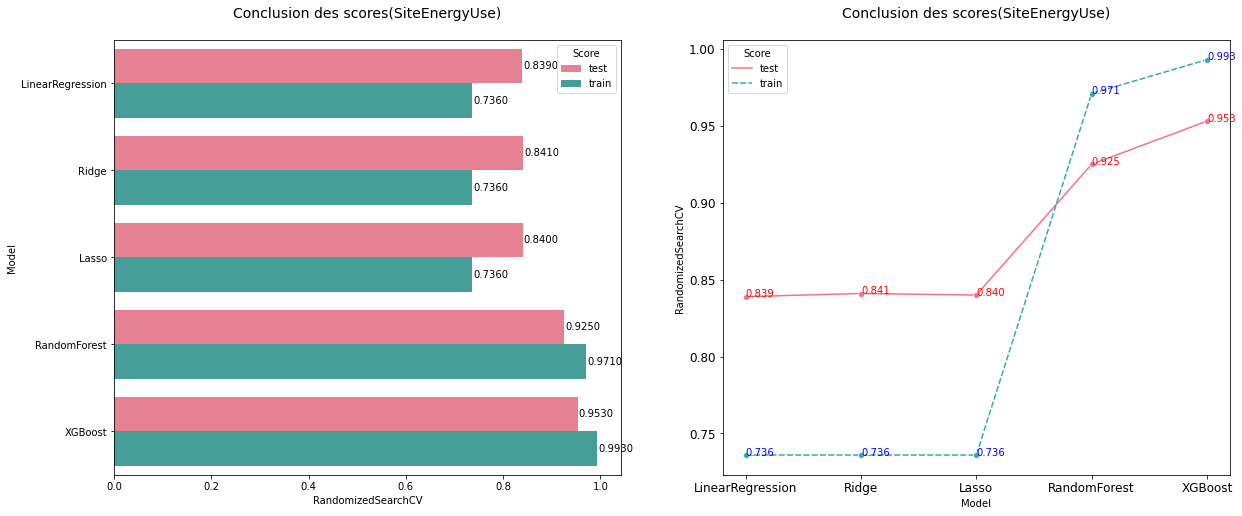

In [149]:
conclusion_score = pd.DataFrame({'Model': ['LinearRegression','LinearRegression', 'Ridge','Ridge', 'Lasso','Lasso', 'RandomForest','RandomForest', 'XGBoost','XGBoost'],
                                 'Sans CV': [0.839,0.736,0.841,0.736,0.840,0.736,0.927,0.974,0.879,0.883], 
                                 'GridSearchCV': [0.839,0.736,0.843,0.730,0.840,0.736,0.927,0.972,0.953,0.993], 
                                 'RandomizedSearchCV': [0.839,0.736,0.841,0.736,0.840,0.736,0.925,0.971,0.953,0.993], 
                                 'Score': ['test', 'train','test', 'train','test', 'train','test', 'train','test', 'train']},
                      index = np.arange(0,10))

conclusion_score

# Graphique des scores
fig, ax = plt.subplots(figsize=(20,8))

plt.subplot(121)
ax = sns.barplot(x="RandomizedSearchCV", y="Model", data=conclusion_score, palette="husl", hue='Score')
ax.set_title("Conclusion des scores(SiteEnergyUse)\n", fontsize=14)


# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(1, 0), textcoords='offset points', ha="left", va="center")

plt.subplot(122)
ax = sns.lineplot(x="Model", y="RandomizedSearchCV", data=conclusion_score, palette="husl", hue='Score',marker='o',style='Score')


for item, color in zip(conclusion_score.groupby('Score'),['r','b']):
    #item[1] is a grouped data frame
    for x,y in item[1][['Model','RandomizedSearchCV']].values:
        ax.text(x,y,f'{y:.3f}',color=color)

# fig.set_size_inches(20, 8)
ax.set_title("Conclusion des scores(SiteEnergyUse)\n", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# **<font color='blue'/>Prédiction des émissions de CO2 (TotalGHGEmissions)**

---



## **Transformation et encodage des données avec le pipeline**

Créer dataframe df_pipeline_ghg

In [150]:
df_pipeline_ghg = df_pred.copy()

col=['PrimaryPropertyType','Neighborhood', 'Count_List',
     'LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',
    # 'LargestPropertyUseTypeGFA', 
    # 'SecondLargestPropertyUseTypeGFA', 
    # 'ThirdLargestPropertyUseTypeGFA',
      'HOTEL',
      'POLICE STATION',
      'OTHER',
      'EDUCATION',
      'HEALTH',
      'OFFICE',
      'COURTHOUSE',
      'AUTOMOBILE DEALERSHIP',
      'WAREHOUSE',
      'STORE',
      'RESIDENCE',
      'MUSEUM',
      'DISTRIBUTION CENTER',
      'PARKING',
      'RESTAURANT',
      'DATA CENTER',
      'CONVENTION CENTER',
      'STRIP MALL',
      'WHOLESALE CLUB/SUPERCENTER',
      'MANUFACTURING/INDUSTRIAL PLANT',
      'LIFESTYLE CENTER',
      'FIRE STATION',
      'PERFORMING ARTS',
      'BANK BRANCH',
      'MOVIE THEATER',
      'PRISON/INCARCERATION',
     'YearBuilt','NumberofBuildings','NumberofFloors',
     'PropertyGFAParking', 'PropertyGFABuilding(s)', 
     'TotalGHGEmissions']

df_pipeline_ghg=df_pipeline_ghg[col]

Convertir les colonnes numériques en (int) et les colonnes catégorielles en (object)

In [151]:
col_astype = ['PrimaryPropertyType', 'Neighborhood']
df_pipeline_ghg[col_astype]=df_pipeline_ghg[col_astype].astype('category')

Séparer les colonnes numériques des colonnes catégorielles

In [152]:
num_features = make_column_selector(dtype_include=np.number)
cat_features = make_column_selector(dtype_exclude=np.number)

Définir les piplines numériques et catégorielles

In [153]:
num_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))

Processus de transformation des données en forme de pipeline

In [154]:
preprocessor = make_column_transformer((num_pipeline, num_features),
                                       (cat_pipeline, cat_features))

Fonction pour extraire les noms des colonnes du transformateur

In [155]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [f for f in column]

        return [f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

## **Régression linéaire**

---

Définir X et y pour notre modèle de régression

In [156]:
X = df_pipeline_ghg.iloc[ :, :-1]
y =  df_pipeline_ghg.iloc[ :, -1:]

Instancier le modèle

In [157]:
pipe = Pipeline([( "transform" , preprocessor),
                 ("lr",LinearRegression())])

Splitter les données en train et test

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=22)

Entaîner le modèle

In [159]:
model = pipe.fit(X_train, y_train)

Tester le modèle sur les données test et train

In [160]:
print('Score test  : ', model.score(X_test, y_test))
print('Score train : ', model.score(X_train, y_train))

Score test  :  0.6992015450945761
Score train :  0.5778819858262327


Définir les meilleurs hyperparamètres avec GridSearchCV

In [161]:
param_grid = {}

grid  = GridSearchCV(pipe, param_grid, cv=6)
grid.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                  

Le modèle avec le meilleur score

In [162]:
grid.best_score_

-1.8108946514960055e+31

Enregistrer le meilleur modèle

In [163]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [164]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.6992015450945761
Score train (GridSearchCV) :  0.5778819858262327


In [165]:
y_pred = model_grid.predict(X_test)

Validation croisée RandomizedSearchCV

In [166]:
model_pipe_grid = RandomizedSearchCV(pipe, param_distributions={}, 
n_iter=1, #Nombre de réglages de paramètres échantillonnés
n_jobs=2,
scoring='r2',
cv=10)

Meilleur score du RandomizedSearchCV

In [167]:
# search = model_grid.fit(X_train, y_train)
model_pipe_grid.fit(X_train, y_train)
model_pipe_grid.best_score_

-4.206167806457074e+31

Entrainer le modèle RandomizedSearchCV

In [168]:
model_pipe_rs = model_pipe_grid.fit(X_train, y_train)

Les meilleurs paramètres

In [169]:
model_pipe_rs.best_params_

{}

Le meilleur score

In [170]:
model_pipe_rs.best_score_

-4.206167806457074e+31

Enregistrer le meilleur modèle

In [171]:
medel_best_rs = model_pipe_rs.best_estimator_

Prédiction sur l'échantillon test

In [172]:
y_pred = medel_best_rs.predict(X_test)

Calculons la RMSE Pipeline correspondante :

In [173]:
print("RMSE Pipeline : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
np.sqrt(np.mean(np.sqrt((y_test.mean() - y_pred.mean()) / y_test.mean()), axis=0))

RMSE Pipeline : 174.36


C:\Users\sweet\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

Tester le modèle RandomizedSearchCV sur les données test et train

In [174]:
print('Score test (RandomizedSearchCV)  : ', medel_best_rs.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_best_rs.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.6992015450945761
Score train (RandomizedSearchCV) :  0.5778819858262327


## **Modèle de régression Ridge**

---

Définir X et y pour notre modèle de régression

In [175]:
X = df_pipeline_ghg.iloc[ :, :-1]
y =  df_pipeline_ghg.iloc[ :, -1:]

Instancier le modèle

In [176]:
lmr = Pipeline([( "transform" , preprocessor),
                 ("lmr",linear_model.Ridge())])

Splitter les données en train et test

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=219)

Entrainer Ridge modèle

In [178]:
model_ridge = lmr.fit(X_train, y_train)

Tester le modèle sur les données test et train

In [179]:
print('Score test  : ', model_ridge.score(X_test, y_test))
print('Score train : ', model_ridge.score(X_train, y_train))

Score test  :  0.7548063214048724
Score train :  0.567750809149352


Validation croisée GridSearchCV

In [180]:
param_grid = {
              'lmr__alpha': [1],
              'lmr__tol':[0.001],
              }

grid  = GridSearchCV(lmr, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                  

Le modèle avec le meilleur score

In [181]:
grid.best_score_

0.48123003565656297

Les meilleurs hyper paramètres utilisés

In [182]:
grid.best_params_

{'lmr__alpha': 1, 'lmr__tol': 0.001}

Enregistrer le meilleur modèle

In [183]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [184]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.7548063214048724
Score train (GridSearchCV) :  0.567750809149352


Validation croisée RandomizedSearchCV

In [185]:
param_distributions= {
                       'lmr__alpha': [1],
                       'lmr__fit_intercept': [True],
                      }

lmr_grid = RandomizedSearchCV(lmr, param_distributions=param_distributions, cv=10)

Entrainer le modèle RandomizedSearchCV

In [186]:
model_lmr_grid = lmr_grid.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleur score du RandomizedSearchCV

In [187]:
model_lmr_grid.best_score_

0.5014966401542724

Les meilleurs paramètres

In [188]:
model_lmr_grid.best_params_

{'lmr__fit_intercept': True, 'lmr__alpha': 1}

Le meilleur score

In [189]:
model_lmr_grid.best_score_

0.5014966401542724

Enregistrer le meilleur modèle

In [190]:
medel_lmr_best = model_lmr_grid.best_estimator_

Prédiction sur l'échantillon test

In [191]:
y_pred = medel_lmr_best.predict(X_test)

Calculons la RMSE du Ridge modèle correspondante :

In [192]:
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE : 155.29


Tester le modèle RandomizedSearchCV sur les données test et train

In [193]:
print('Score test (RandomizedSearchCV)  : ', medel_lmr_best.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_lmr_best.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.7548063214048724
Score train (RandomizedSearchCV) :  0.567750809149352


## **Modèle de régression Lasso**

---

Définir X et y pour notre modèle de régression

In [194]:
X = df_pipeline_ghg.iloc[ :, :-1]
y =  df_pipeline_ghg.iloc[ :, -1:]

Instancier le modèle

In [195]:
lml = Pipeline([( "transform" , preprocessor),
                 ("lml",linear_model.Lasso())])

Splitter les données en train et test

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=162)

Entrainer Le modèle Lasso

In [197]:
model_lasso = lml.fit(X_train, y_train)

Tester le modèle sur les données test et train

In [198]:
print('Score test  : ', lml.score(X_test, y_test))
print('Score train : ', lml.score(X_train, y_train))

Score test  :  0.7678383845726526
Score train :  0.5457792796786209


Validation croisée GridSearchCV

In [199]:
param_grid = {
              'lml__alpha': [1],
              'lml__fit_intercept': [True],
              'lml__tol':[0],
              'lml__selection':['random'],
              }

grid  = GridSearchCV(lml, param_grid, cv=10)
grid.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.960e-08, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e-07, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.470e-08, toleranc

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                 

Le modèle avec le meilleur score

In [200]:
grid.best_score_

0.4742187539156645

Les meilleurs hyper paramètres utilisés

In [201]:
grid.best_params_

{'lml__alpha': 1,
 'lml__fit_intercept': True,
 'lml__selection': 'random',
 'lml__tol': 0}

Enregistrer le meilleur modèle

In [202]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [203]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.7678356805614492
Score train (GridSearchCV) :  0.5457771329993752


Validation croisée RandomizedSearchCV

In [204]:
param_distributions= {
                      'lml__alpha': [1],
                      'lml__fit_intercept': [True],
                      'lml__tol':[0],
                      'lml__selection':['random'],
                      }

lml_grid_rd = RandomizedSearchCV(lml, param_distributions=param_distributions, cv=10)
lml_grid_rd.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.451e-08, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.960e-08, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\linear_m

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpl

Meilleur score du RandomizedSearchCV

In [205]:
lml_grid_rd.best_score_

0.4742187539156645

Les meilleurs paramètres

In [206]:
lml_grid_rd.best_params_

{'lml__tol': 0,
 'lml__selection': 'random',
 'lml__fit_intercept': True,
 'lml__alpha': 1}

Le meilleur score

In [207]:
lml_grid_rd.best_score_

0.4742187539156645

Enregistrer le meilleur modèle

In [208]:
medel_best_rscv = lml_grid_rd.best_estimator_

Prédiction sur l'échantillon test

In [209]:
y_pred = medel_best_rscv.predict(X_test)

Calculons la RMSE du Lasso modèle correspondante :

In [210]:
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE : 149.86


Tester le modèle RandomizedSearchCV sur les données test et train

In [211]:
print('Score test (RandomizedSearchCV)  : ', medel_best_rscv.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_best_rscv.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.7678356805614495
Score train (RandomizedSearchCV) :  0.5457771329993752


## **Modèle de régression Random Forest**
---





Définir X et y

In [212]:
X = df_pipeline_ghg.iloc[ :, :-1]
y =  df_pipeline_ghg.iloc[ :, -1:]
# y =  np.ravel(df_pipeline_ghg.iloc[ :, -1:])

Créer l'objet RandomForestRegressor 

In [213]:
rfr = Pipeline([
                ("transform" , preprocessor),
                ("rfr",RandomForestRegressor())
                 ])

Splitter les données en train et test

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=177, shuffle=['LargestPropertyUseType'])

Entraîner le modèle RandomForest

In [215]:
rfr.fit(X_train,y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_

Evaluer le modèle RandomForest

In [216]:
r_square = metrics.r2_score(y_test, y_pred)
print('R square error RandomForest: ', r_square)

R square error RandomForest:  -0.9746624256051151


Score r2 du modèle test et train

In [217]:
print('Score test  : ', rfr.score(X_test,y_test))
print('Score train : ', rfr.score(X_train,y_train))

Score test  :  0.9028964622957013
Score train :  0.9551773037166791


Afficher les caractéristiques les plus importantes :

C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer simpleimputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer standardscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


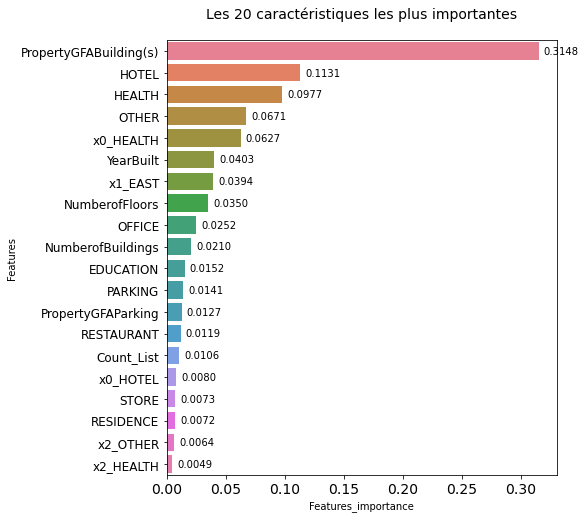

In [218]:
  # Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': get_feature_names(preprocessor),
              'Features_importance':rfr['rfr'].feature_importances_
              })
df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20,palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Ci-dessous le graphique de valeurs tests et les valeurs prédites :

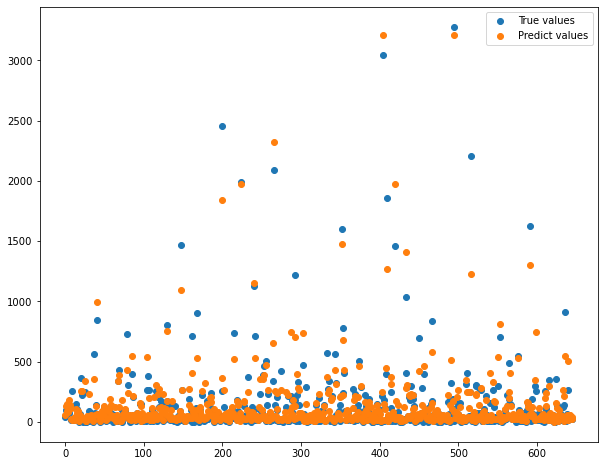

In [219]:
fig = plt.subplots(figsize=(10,8))

y_pred = rfr.predict(X_test)
x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

Validatinon croisée GridSearchCV pour Définir les meilleurs hyperparamètres

In [220]:
param_grid = {
              'rfr__n_estimators': [200],
              'rfr__max_depth': [30],
              'rfr__max_features':[50],
              'rfr__min_samples_leaf':[1],
              # 'rfr__min_samples_split':[2],
              }

grid  = GridSearchCV(rfr, param_grid, cv=9)
grid.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

GridSearchCV(cv=9,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                  

Le modèle avec le meilleur score

In [221]:
grid.best_score_

0.6526266554822335

Les meilleurs hyperparamètres utilisés

In [222]:
grid.best_params_

{'rfr__max_depth': 30,
 'rfr__max_features': 50,
 'rfr__min_samples_leaf': 1,
 'rfr__n_estimators': 200}

Enregistrer le meilleur modèle

In [223]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [224]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.8963073265856588
Score train (GridSearchCV) :  0.9591989621579916


Recherche à validation croisée randomisée RandomizedSearchCV

In [225]:
param_distributions = { 
                        'rfr__n_estimators': [90], #Le nombre d'arbres dans la forêt
                        'rfr__max_depth': [30], #la profondeur de l'arbre
                        'rfr__max_features':['auto'], #The number of features to consider when looking for the best split
                        'rfr__min_samples_leaf':[1], #Le minimum d'échantillons par feuille
                        'rfr__min_samples_split':[2], #Le nombre minimum d'échantillons requis pour diviser un nœud interne
                     }
rscv = RandomizedSearchCV(rfr, param_distributions=param_distributions, cv=10)
rscv.fit(X_train,y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpl

Le meilleur score

In [226]:
rscv.best_score_

0.6898746711171155

Les meilleurs paramètres

In [227]:
rscv.best_params_

{'rfr__n_estimators': 90,
 'rfr__min_samples_split': 2,
 'rfr__min_samples_leaf': 1,
 'rfr__max_features': 'auto',
 'rfr__max_depth': 30}

Enregistrer le meilleur modèle

In [228]:
medel_best_rscv = rscv.best_estimator_

Prédiction sur l'échantillon test

In [279]:
y_pred = model_grid.predict(X_test)

Calculons la RMSE correspondante :

In [280]:
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE : 80.03


Tester le modèle RandomizedSearchCV sur les données test et train

In [231]:
print('Score test (RandomizedSearchCV)  : ', medel_best_rscv.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_best_rscv.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.8765425848465873
Score train (RandomizedSearchCV) :  0.9549417354680059


## **Modèle de régression xgboost**

---



Définir X et y

In [232]:
X = df_pipeline_ghg.iloc[ :, :-1]
y =  df_pipeline_ghg.iloc[ :, -1:]

Créer l'objet XGBoost 

In [233]:
xgbr = Pipeline([
                 ("transform" , preprocessor),
                 ("xgbr",XGBRegressor())
                 ])

Splitter les données en train et test

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30, shuffle=['LargestPropertyUseType'])

Entraîner le modèle

In [235]:
model = xgbr.fit(X_train, y_train)

Score r2 du modèle sur les données test et train

In [236]:
print('Score test  : ', model.score(X_test, y_test))
print('Score train : ', model.score(X_train, y_train))

Score test  :  0.9151329842205058
Score train :  0.987526995456593


Afficher les caractéristiques les plus importantes :

C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer simpleimputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer standardscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


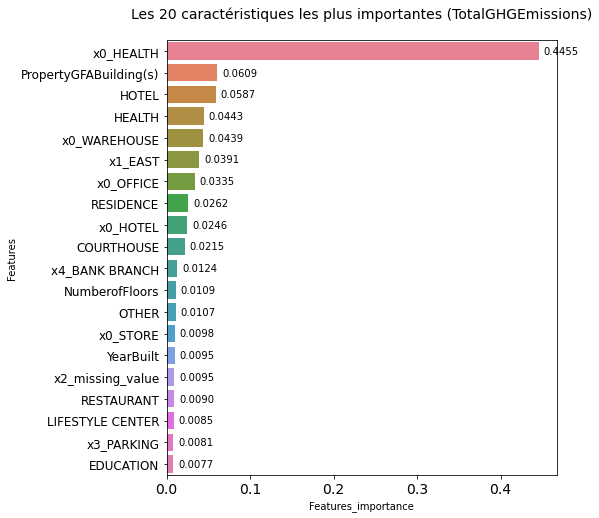

In [237]:
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': get_feature_names(preprocessor),
              'Features_importance':xgbr['xgbr'].feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes (TotalGHGEmissions)\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Graphique des vraies valeurs avec et les valeurs prédites 

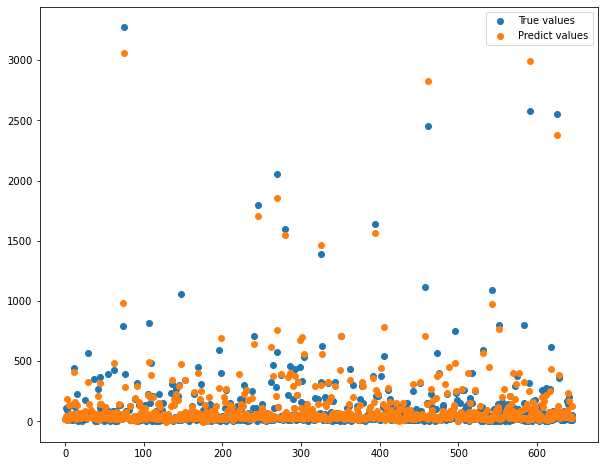

In [238]:
fig = plt.subplots(figsize=(10,8))

y_pred = model.predict(X_test)
x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

Définir les meilleurs hyperparamètres avec GridSearchCV

In [239]:
param_grid = {
                'xgbr__n_estimators': [80],
                'xgbr__alpha':[0],
                'xgbr__max_features': ['auto'],
                'xgbr__max_depth': [30],
                'xgbr__subsample': [0.642],
                'xgbr__min_samples_split': [1],
                'xgbr__min_samples_leaf': [1],
                'xgbr__validate_parameters':['True'],
                'xgbr__gamma':[0.9],
                'xgbr__learning_rate':[0.22],
                'xgbr__colsample_bytree': [0.655],
                'xgbr__lambda': [1],
                # 'xgbr__sampling_method': ['uniform'],
                'xgbr__max_leaves': [0],
              }

grid  = GridSearchCV(xgbr, param_grid, cv=5)
grid.fit(X_train, y_train)

[09:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                  

GridSearchCV : Le modèle avec le meilleur score

In [240]:
grid.best_score_

0.7491703342663736

GridSearchCV : Les meilleurs hyperparamètres utilisés

In [241]:
grid.best_params_

{'xgbr__alpha': 0,
 'xgbr__colsample_bytree': 0.655,
 'xgbr__gamma': 0.9,
 'xgbr__lambda': 1,
 'xgbr__learning_rate': 0.22,
 'xgbr__max_depth': 30,
 'xgbr__max_features': 'auto',
 'xgbr__max_leaves': 0,
 'xgbr__min_samples_leaf': 1,
 'xgbr__min_samples_split': 1,
 'xgbr__n_estimators': 80,
 'xgbr__subsample': 0.642,
 'xgbr__validate_parameters': 'True'}

GridSearchCV : Enregistrerle meilleur modèle

In [242]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [243]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.9258685364985352
Score train (GridSearchCV) :  0.9958538295100726


Graphique valeurs tests / Valeurs prédites

In [244]:
y_pred = model_grid.predict(X_test)

df_xgbr = pd.DataFrame({'prediction' : y_pred,
                        'true value': y_test['TotalGHGEmissions'].values})

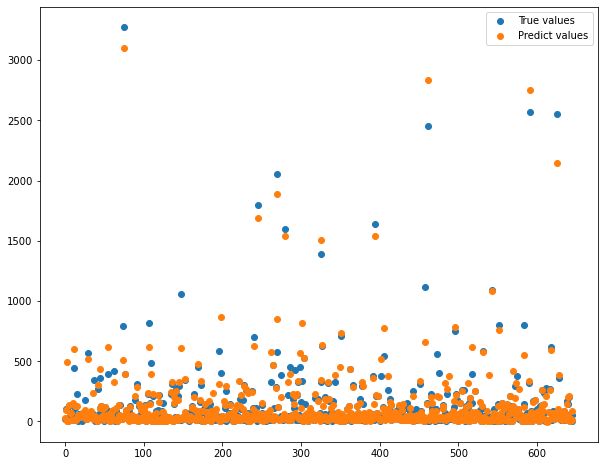

In [245]:
fig = plt.subplots(figsize=(10,8))

x_ax = range(len(y_test))

plt.scatter(x_ax, df_xgbr['true value'], label='True values')
plt.scatter(x_ax, df_xgbr['prediction'], label='Predict values')

plt.legend()
plt.show()

Recherche à validation croisée randomisée RandomizedSearchCV

In [246]:
param_distributions = { 
                        'xgbr__n_estimators': [80],
                        'xgbr__alpha':[0],
                        'xgbr__max_features': ['auto'],
                        'xgbr__max_depth': [30],
                        'xgbr__subsample': [0.642],
                        'xgbr__min_samples_split': [1],
                        'xgbr__min_samples_leaf': [1],
                        # 'xgbr__bootstrap': [True],
                        'xgbr__validate_parameters':['True'],
                        'xgbr__gamma':[1],
                        'xgbr__learning_rate':[0.22],
                        'xgbr__colsample_bytree': [0.655],
                        'xgbr__lambda': [1],
                        # 'xgbr__sampling_method': ['uniform'],
                        'xgbr__max_leaves': [0],
                       }

rscv = RandomizedSearchCV(xgbr, param_distributions=param_distributions, n_iter=4, cv=7)
rscv.fit(X_train,y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=4. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[09:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simple

RandomizedSearchCV : Le meilleur score

In [247]:
rscv.best_score_

0.749273499371799

RandomizedSearchCV : Les meilleurs paramètres

In [248]:
rscv.best_params_

{'xgbr__validate_parameters': 'True',
 'xgbr__subsample': 0.642,
 'xgbr__n_estimators': 80,
 'xgbr__min_samples_split': 1,
 'xgbr__min_samples_leaf': 1,
 'xgbr__max_leaves': 0,
 'xgbr__max_features': 'auto',
 'xgbr__max_depth': 30,
 'xgbr__learning_rate': 0.22,
 'xgbr__lambda': 1,
 'xgbr__gamma': 1,
 'xgbr__colsample_bytree': 0.655,
 'xgbr__alpha': 0}

RandomizedSearchCV : Enregistrer le meilleur modèle

In [249]:
medel_best_rscv = rscv.best_estimator_

Prédiction sur l'échantillon test

In [250]:
y_pred = medel_best_rscv.predict(X_test)

Calculons la RMSE du xgboost modèle correspondante :

In [251]:
print("RMSE xgboost : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE xgboost : 78.44


Tester le modèle RandomizedSearchCV sur les données test et train

In [252]:
print('Score test (RandomizedSearchCV)  : ', medel_best_rscv.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_best_rscv.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.9268386177346981
Score train (RandomizedSearchCV) :  0.9958633971728594


Graphique valeurs tests / Valeurs prédites

In [253]:
y_pred = medel_best_rscv.predict(X_test)

df_xgbr = pd.DataFrame({'prediction' : y_pred,
                        'true value': y_test['TotalGHGEmissions'].values})

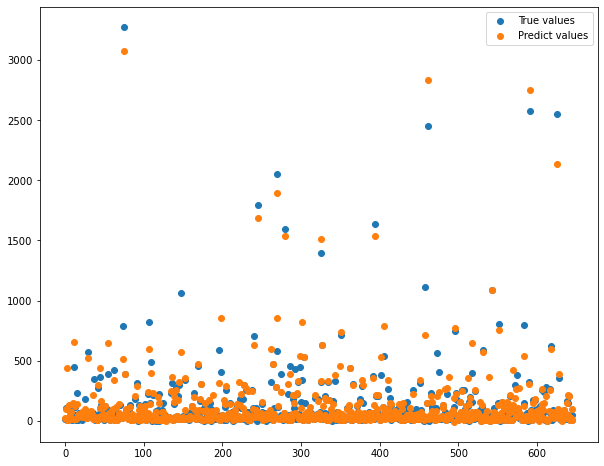

In [254]:
fig = plt.subplots(figsize=(10,8))

x_ax = range(len(y_test))

plt.scatter(x_ax, df_xgbr['true value'], label='True values')
plt.scatter(x_ax, df_xgbr['prediction'], label='Predict values')

plt.legend()
plt.show()

## **Modèle xgboost avec ENERGY Star**

---



Créer dataframe avec la variable "ENERGYSTARScore"

In [255]:
df_pipe_score = df_pred.copy()

col_score=['PrimaryPropertyType','Neighborhood', 'Count_List',
           'LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',
        # 'LargestPropertyUseTypeGFA', 
        # 'SecondLargestPropertyUseTypeGFA', 
        # 'ThirdLargestPropertyUseTypeGFA',
          'HOTEL',
          'POLICE STATION',
          'OTHER',
          'EDUCATION',
          'HEALTH',
          'OFFICE',
          'COURTHOUSE',
          'AUTOMOBILE DEALERSHIP',
          'WAREHOUSE',
          'STORE',
          'RESIDENCE',
          'MUSEUM',
          'DISTRIBUTION CENTER',
          'PARKING',
          'RESTAURANT',
          'DATA CENTER',
          'CONVENTION CENTER',
          'STRIP MALL',
          'WHOLESALE CLUB/SUPERCENTER',
          'MANUFACTURING/INDUSTRIAL PLANT',
          'LIFESTYLE CENTER',
          'FIRE STATION',
          'PERFORMING ARTS',
          'BANK BRANCH',
          'MOVIE THEATER',
          'PRISON/INCARCERATION',
          'YearBuilt','NumberofBuildings','NumberofFloors',
          'PropertyGFAParking', 'PropertyGFABuilding(s)', 
          'ENERGYSTARScore',
          'TotalGHGEmissions']
df_pipe_score = df_pipe_score[col_score]

Définir X et y

In [256]:
X = df_pipe_score.iloc[ :, :-1]
y = df_pipe_score.iloc[ :, -1:]

Créer l'objet XGBoost 

In [257]:
xgbr = Pipeline([
                 ("transform" , preprocessor),
                 ("xgbr",XGBRegressor())
                 ])

Splitter les données en train et test

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

Entraîner le modèle

In [259]:
model = xgbr.fit(X_train, y_train)

Score r2 du modèle sur les données test et train

In [260]:
print('Score test  : ', model.score(X_test, y_test))
print('Score train : ', model.score(X_train, y_train))

Score test  :  0.9145715260704562
Score train :  0.9909257295975117


Afficher les caractéristiques les plus importantes :

C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer simpleimputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\AppData\Local\Temp/ipykernel_14276/4106244633.py:30: UserWarning: Transformer standardscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\sweet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


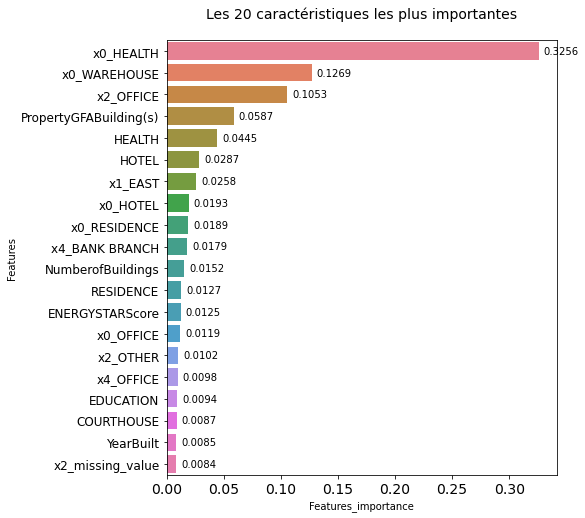

In [261]:
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': get_feature_names(preprocessor),
              'Features_importance':xgbr['xgbr'].feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Graphique des vraies valeurs avec et valeurs prédites 

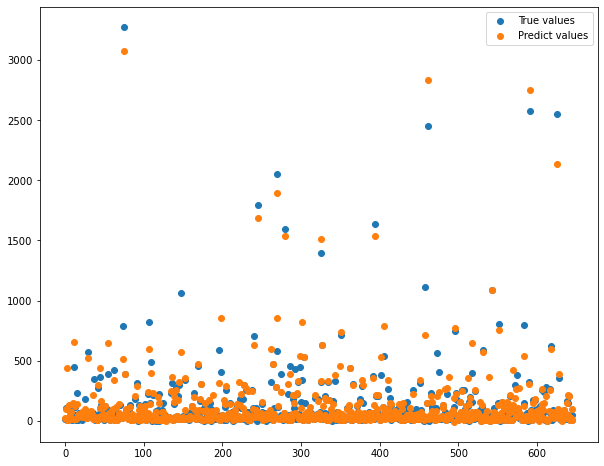

In [262]:
fig = plt.subplots(figsize=(10,8))

x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

Définir les meilleurs hyperparamètres avec GridSearchCV

In [263]:
param_grid = {
                'xgbr__n_estimators': [80],
                'xgbr__alpha':[0],
                'xgbr__max_features': ['auto'],
                'xgbr__max_depth': [30],
                'xgbr__subsample': [0.642],
                'xgbr__min_samples_split': [1],
                'xgbr__min_samples_leaf': [1],
                'xgbr__validate_parameters':['True'],
                'xgbr__gamma':[0.9],
                'xgbr__learning_rate':[0.22],
                'xgbr__colsample_bytree': [0.655],
                'xgbr__lambda': [1],
                # 'xgbr__sampling_method': ['uniform'],
                'xgbr__max_leaves': [0],
              }

grid  = GridSearchCV(xgbr, param_grid, cv=5)
grid.fit(X_train, y_train)

[09:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                  

GridSearchCV : Le modèle avec le meilleur score

In [264]:
grid.best_score_

0.7189298114406133

GridSearchCV : Les meilleurs hyperparamètres utilisés

In [265]:
grid.best_params_

{'xgbr__alpha': 0,
 'xgbr__colsample_bytree': 0.655,
 'xgbr__gamma': 0.9,
 'xgbr__lambda': 1,
 'xgbr__learning_rate': 0.22,
 'xgbr__max_depth': 30,
 'xgbr__max_features': 'auto',
 'xgbr__max_leaves': 0,
 'xgbr__min_samples_leaf': 1,
 'xgbr__min_samples_split': 1,
 'xgbr__n_estimators': 80,
 'xgbr__subsample': 0.642,
 'xgbr__validate_parameters': 'True'}

GridSearchCV : Enregistrerle meilleur modèle

In [266]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [267]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.923851783637584
Score train (GridSearchCV) :  0.9988624699622093


In [268]:
y_pred = model_grid.predict(X_test)

In [269]:
df_xgbr = pd.DataFrame({'prediction' : y_pred,
                        'true value': y_test['TotalGHGEmissions'].values})

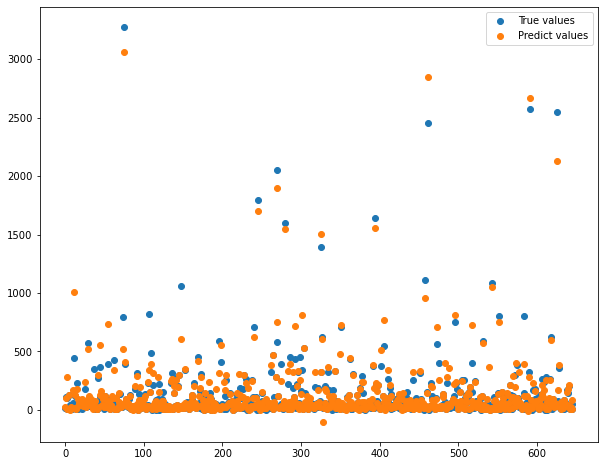

In [270]:
fig = plt.subplots(figsize=(10,8))

x_ax = range(len(y_test))

plt.scatter(x_ax, df_xgbr['true value'], label='True values')
plt.scatter(x_ax, df_xgbr['prediction'], label='Predict values')

plt.legend()
plt.show()

Recherche à validation croisée randomisée RandomizedSearchCV

In [271]:
param_distributions = { 
                        'xgbr__n_estimators': [80],
                        'xgbr__alpha':[0],
                        'xgbr__max_features': ['auto'],
                        'xgbr__max_depth': [30],
                        'xgbr__subsample': [0.642],
                        'xgbr__min_samples_split': [1],
                        'xgbr__min_samples_leaf': [1],
                        # 'xgbr__bootstrap': [True],
                        'xgbr__validate_parameters':['True'],
                        'xgbr__gamma':[1],
                        'xgbr__learning_rate':[0.22],
                        'xgbr__colsample_bytree': [0.655],
                        'xgbr__lambda': [1],
                        # 'xgbr__sampling_method': ['uniform'],
                        'xgbr__max_leaves': [0],
                       }

rscv = RandomizedSearchCV(xgbr, param_distributions=param_distributions, n_iter=4, cv=7)
rscv.fit(X_train,y_train)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=4. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[09:29:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:29:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002587C662BE0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simple

RandomizedSearchCV : Le meilleur score

In [272]:
rscv.best_score_

0.7759431298414575

RandomizedSearchCV : Les meilleurs paramètres

In [273]:
rscv.best_params_

{'xgbr__validate_parameters': 'True',
 'xgbr__subsample': 0.642,
 'xgbr__n_estimators': 80,
 'xgbr__min_samples_split': 1,
 'xgbr__min_samples_leaf': 1,
 'xgbr__max_leaves': 0,
 'xgbr__max_features': 'auto',
 'xgbr__max_depth': 30,
 'xgbr__learning_rate': 0.22,
 'xgbr__lambda': 1,
 'xgbr__gamma': 1,
 'xgbr__colsample_bytree': 0.655,
 'xgbr__alpha': 0}

RandomizedSearchCV : Enregistrer le meilleur modèle

In [274]:
medel_best_rscv = rscv.best_estimator_

Prédiction sur l'échantillon test

In [275]:
y_pred = medel_best_rscv.predict(X_test)

Calculons la RMSE du xgboost modèle correspondante :

In [276]:
print("RMSE xgboost : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE xgboost : 79.80


Tester le modèle RandomizedSearchCV sur les données test et train

In [277]:
print('Score test (RandomizedSearchCV)  : ', medel_best_rscv.score(X_test,y_test))
print('Score train (RandomizedSearchCV) : ', medel_best_rscv.score(X_train,y_train))

Score test (RandomizedSearchCV)  :  0.9242897360020526
Score train (RandomizedSearchCV) :  0.9988583799953383


## **Conclusions**

---


Tableau de performance des modèles

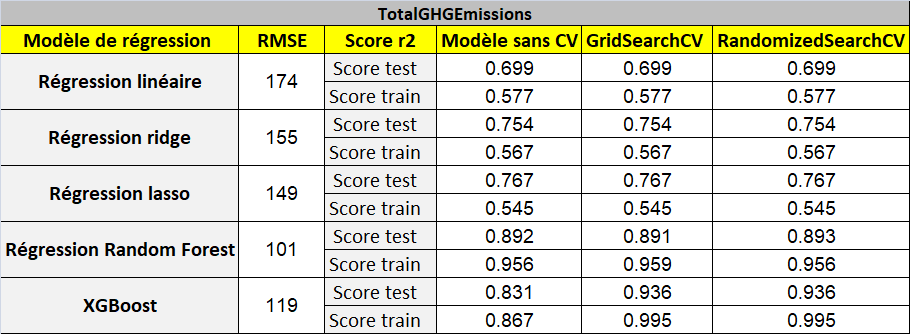

Graphique des conclusions des scores

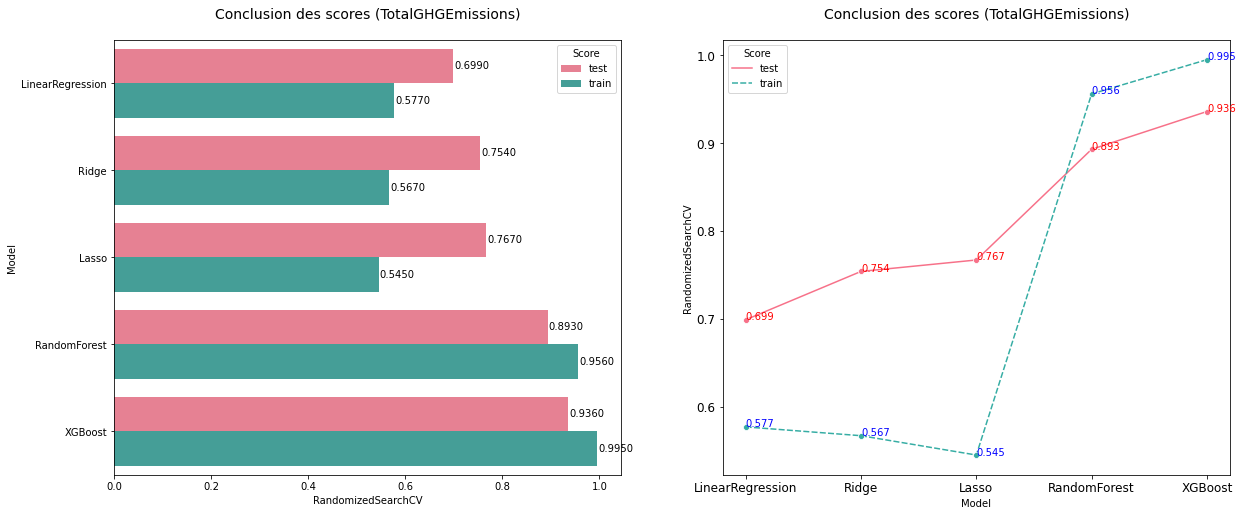

In [278]:
conclusion_score = pd.DataFrame({'Model': ['LinearRegression','LinearRegression', 'Ridge','Ridge', 'Lasso','Lasso', 'RandomForest','RandomForest', 'XGBoost','XGBoost'],
                                 'Sans CV': [0.699,0.577,0.754,0.567,0.767,0.545,0.892,0.956,0.831,0.867], 
                                 'GridSearchCV': [0.699,0.577,0.754,0.567,0.767,0.545,0.891,0.959,0.936,0.995], 
                                 'RandomizedSearchCV': [0.699,0.577,0.754,0.567,0.767,0.545,0.893,0.956,0.936,0.995], 
                                 'Score': ['test', 'train','test', 'train','test', 'train','test', 'train','test', 'train']},
                      index = np.arange(0,10))


# Graphique des scores
fig, ax = plt.subplots()

plt.subplot(121)
ax = sns.barplot(x="RandomizedSearchCV", y="Model", data=conclusion_score, palette="husl", hue='Score')
ax.set_title("Conclusion des scores (TotalGHGEmissions)\n", fontsize=14)


# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(1, 0), textcoords='offset points', ha="left", va="center")

plt.subplot(122)
ax = sns.lineplot(x="Model", y="RandomizedSearchCV", data=conclusion_score, palette="husl", hue='Score',marker='o',style='Score')

for item, color in zip(conclusion_score.groupby('Score'),['r', 'b']):
    #item[1] is a grouped data frame
    for x,y in item[1][['Model','RandomizedSearchCV']].values:
        ax.text(x,y,f'{y:.3f}',color=color)


# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(20, 8)
ax.set_title("Conclusion des scores (TotalGHGEmissions)\n", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()